## Google Colaboratory

Starting now, for Deep Learning, we would be using Google Colab. <a href="https://research.google.com">Google Colaboratory </a> or 'Colab' for short, are Jupyter notebooks that are hosted by Colab and run on Google Cloud Server.

### Why are we using colab in this course? Why not stick to Jupyter?

You must have realised, a foward pass or backward propgation in **Neural Networks is all about lots and lots of matrix (or tensor) multiplication**. In order to do that efficiently, we would need to use hardware accelerators like Graphical Processing Unit (GPU). Libraries like Tensorflow, Keras and PyTorch allow you create matrices (and tensors) like NumPy, but also support computation using accelerater hardwares like GPU. 


Although, most likely, your system would have some GPU card installed but we wouldn't suggest using one installed in your local system as the driver installation task is tedious and non-robust. The biggest reason of using Colab is to use Google Cloud Server's GPU but it has various other nice features

- Zero configuration required
- **Free access to TPUs and GPUs**
- Easy sharing
- Integrated with Google Drive


Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

As you go to https://research.google.com, you would find multiple options to open a Notebook

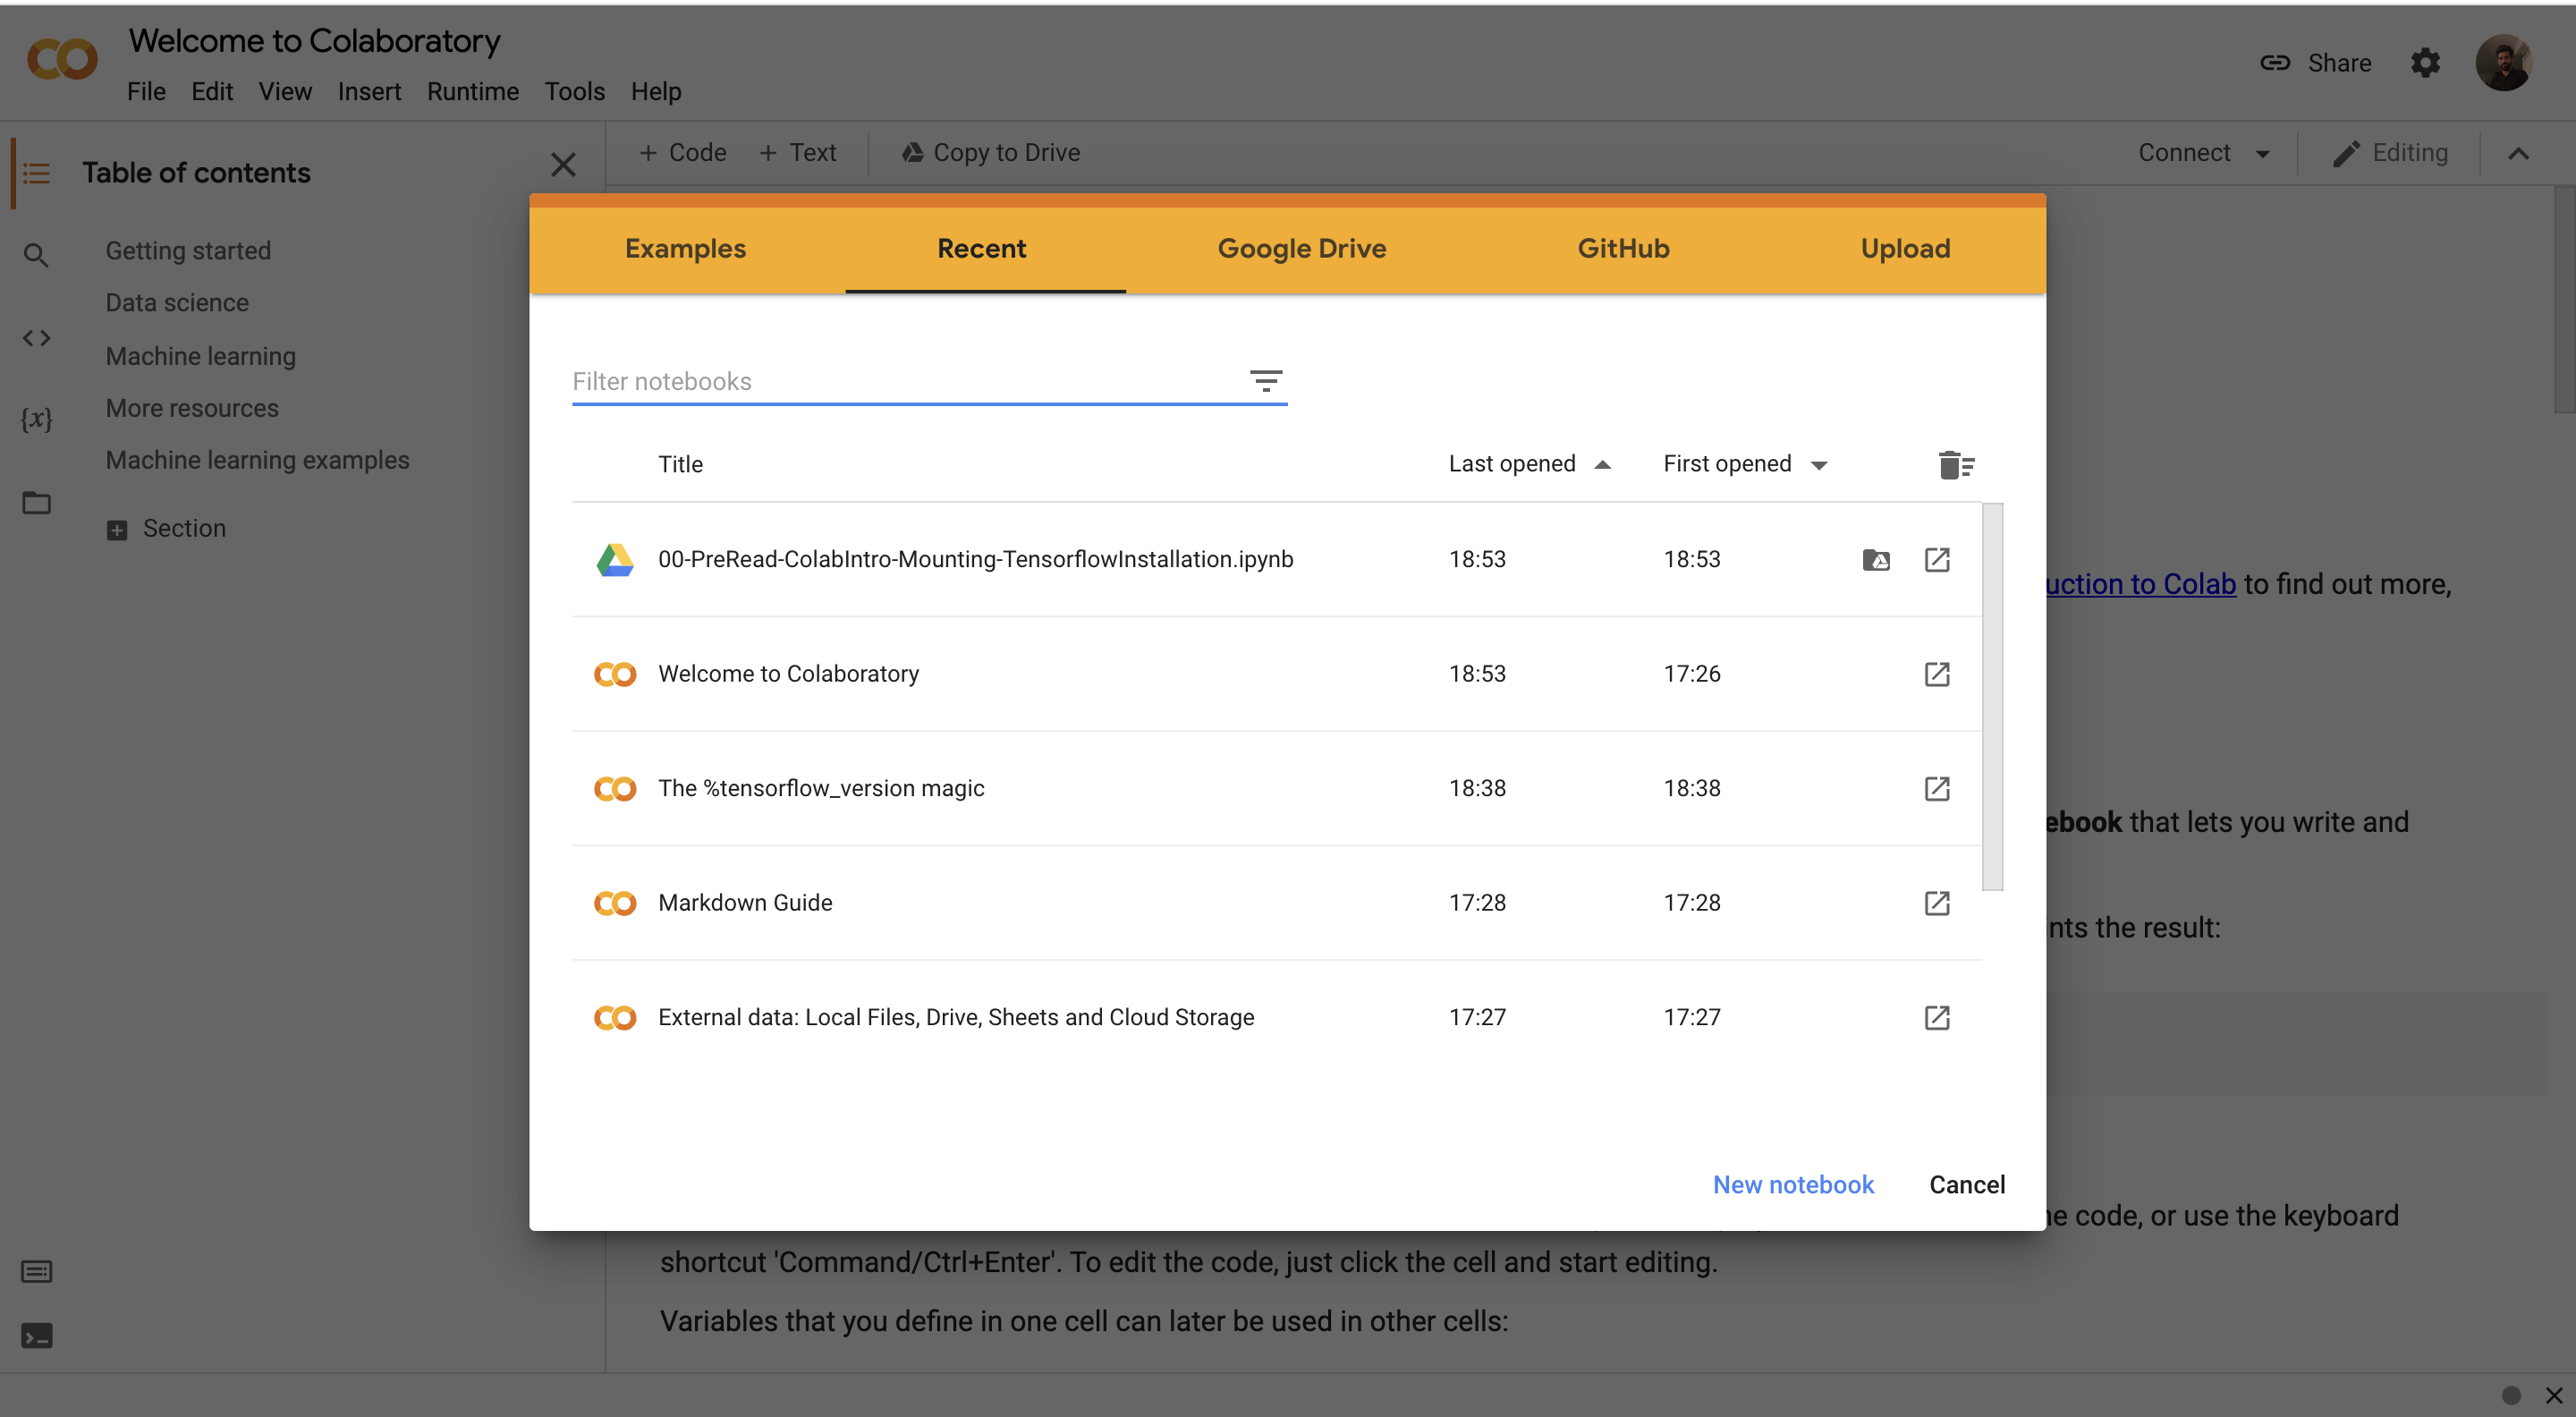

- If you have already been working on a Jupyter Notebook locally, you can upload it too. 
- When you create your own Colab notebooks, they are stored in your Google Drive account. 

Alright, I understand, we are switching to Google Colab for computation

### Follow this tutorial in Google Colab only

## How do I access my data while working on Colab Notebook?

### Case 1: When the data is present in your local system

#### Uploading files from your local file system

- `files.upload` provides an interface to click a button and upload the files.
- It finally returns a dictionary of the files which were uploaded.
- The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spiral.csv to spiral.csv
User uploaded file "spiral.csv" with length 12566 bytes


#### Downloading files to your local file system

<code>files.download</code> will invoke a browser download of the file to your local computer.

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



### Case 2: If the data is present in your own Google Drive (MyDrive)

#### Mount your Google Drive in the runtime's virtual machine

The example below shows how to mount your Google Drive on your runtime using an authorisation code, and how to write and read files there. 

On running, `drive.mount('/content/drive')` it will ask you for permission to access your Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


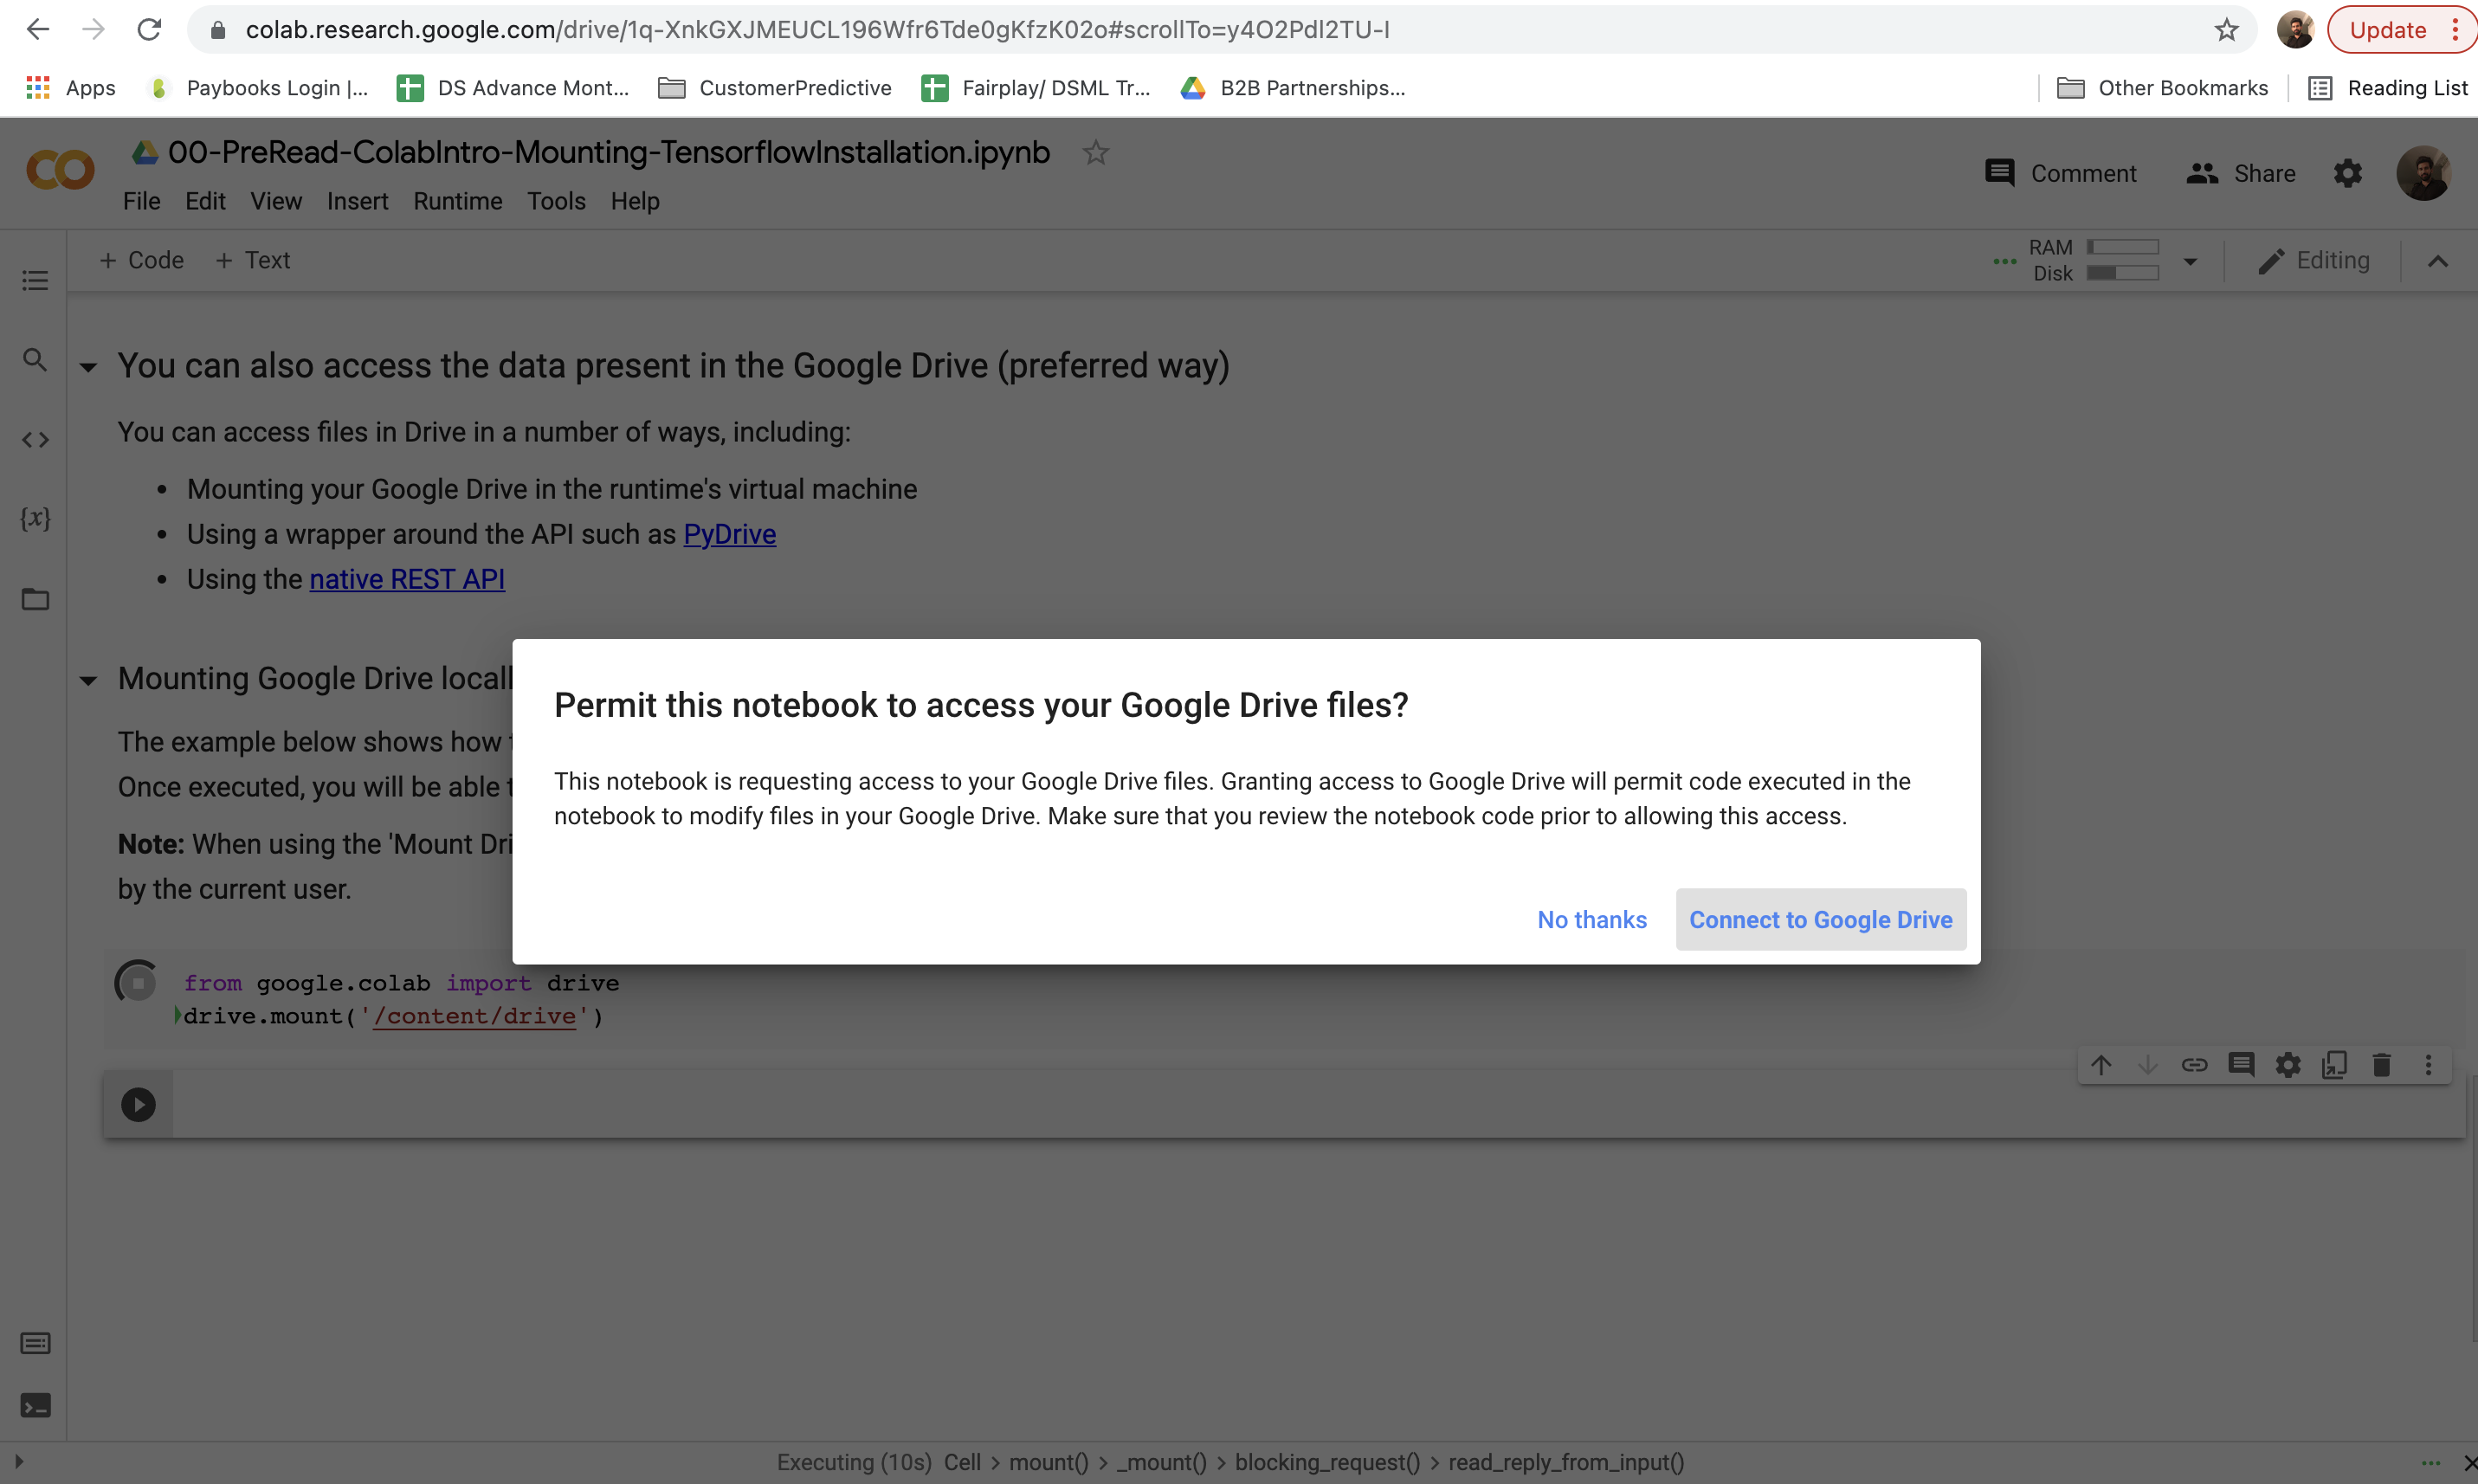



Now, we will first write a file in the Google Drive.

In [ ]:
!ls /content/drive

MyDrive  Shareddrives


In [ ]:
with open('/content/drive/MyDrive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/MyDrive/foo.txt 

Hello Google Drive!

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


Similarly, we can access and open any file same way

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/foo.txt', 'r') as f:
  print(f.readline())

Mounted at /content/drive
Hello Google Drive!


### Case 3: When the data is shared by someone using Google Drive


PyDrive is a wrapper for the Google Drive python client. It has first-class support on CoLab! \
Here is an example of how we can download a file in CoLab given that we have the shared link and name of the file.

But lets first install PyDrive since it doesn't come pre-installed in Colab


In [ ]:
# Install PyDrive
!pip install PyDrive

- Lets do the required imports, and perfom the authorisation

In [ ]:
# Import Modules
from google.colab import auth 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

**Now lets do Google Authorisation and create PyDrive client**

- Once, you run the cell below, you will be given an authorisation link.
- Cick on the given link, it will redirect to a new tab for Google login. 
- Choose your  Scaler Google Account (username@scaler.com). 
- Allow Google Cloud SDK to access your account by clicking on “Allow.” 
- Copy and paste the token in “Enter verification code:” to finish the authorisation

In [ ]:
# Authenticate and Create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)      

Now, we will use this client object `drive` to download the necessary files into the Colab environment.

In order to download a file, we need two things
1. Shareable Google Drive file link 
   - Lets use https://drive.google.com/file/d/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU/view?usp=sharing. 
   - We use this link to extract the ID given between `https://drive.google.com/file/d/` and `view?usp=sharing/`
   - Here ID would be **1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU**
2. Name of the file - `healthyfime_tfkeras.csv`

Now, lets use the ID and filename to download the data into Colab environment



In [ ]:
downloaded = drive.CreateFile({'id':"1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU"}) # ID of the file (from link)
downloaded.GetContentFile('healthyfime_tfkeras.csv') # name of the File

Lets confirm `healthyfime_tfkeras.csv` is present in the enviroment

In [ ]:
!ls

adc.json  healthyfime_tfkeras.csv  sample_data


Lets try importing this data with pandas

In [ ]:
import pandas as pd
df = pd.read_csv("healthyfime_tfkeras.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


We will be using tensorflow2.0 (includes Keras) in this course, lets read aboout a bit of its history

## Tensorflow

TensorFlow was developed by the Google Brain team for internal Google use in research and production. The initial version was released under the Apache License 2.0 in 2015 - Tensorflow 1.x. Google released the updated version of TensorFlow, named TensorFlow 2.0, in September 2019. We will be using version 2.x in this course, and will talk about it in detail in the class. But lets briefly discuss the Colab's support for tensorflow. 

Colab has two versions of TensorFlow pre-installed: 
- 2.x version
- 1.x version. 

Colab uses TensorFlow 2.x by default and running `import tensorflow` will import the default version (currently 2.x).

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.7.0


You can use 1.x by running a cell with the tensorflow_version magic before you run import tensorflow.

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.7.0


#### Avoid Using ``pip install`` for tensorflow installation on Colab